In [1]:
import numpy as np

In [5]:
from pandas import DataFrame as DFrm, read_csv

In [78]:
from scipy.interpolate import interp1d

In [11]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [117]:
%matplotlib inline

In [118]:
f_bar = 1 - .87
f_dm = 1 - f_bar

In [119]:
M = read_csv('tmpdata/mass_prof.csv')

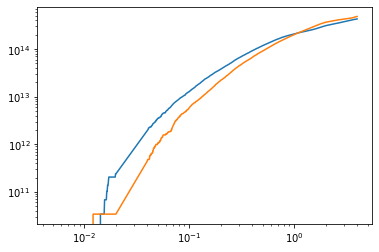

In [178]:
plt.loglog(M.r,M.Mdr)
plt.loglog(M.r,M.Mdr_dmo)

In [180]:
Ms =  M.rolling(5).mean()

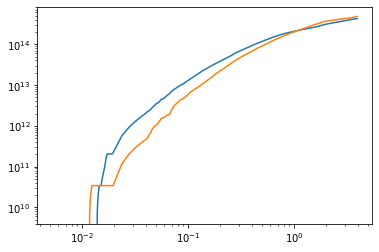

In [181]:
plt.loglog(Ms.r,Ms.Mdr)
plt.loglog(Ms.r,Ms.Mdr_dmo)

In [182]:
r, Mdr, Mdr_dmo = Ms.r.to_numpy(), Ms.Mdr.to_numpy(), Ms.Mdr_dmo.to_numpy()

In [183]:
Mhal = 3.6e14 #Mdr_dmo[-1]

In [184]:
Mgal = Mhal*f_bar/f_dm
Mgal

53793103448275.86

In [185]:
def M_IsoT_inner(r,a):
    return r - a*np.arctan(r/a)

In [186]:
def M_IsoT(r,a, size=.3):
    return np.where(r<size, M_IsoT_inner(r,a)/M_IsoT_inner(size,a), 1)

In [187]:
M_IsoT(.2,a)

array(0.50992269)

In [188]:
a=.1

In [189]:
Mbr = M_IsoT(r,a)

In [190]:
Mbr*=Mgal

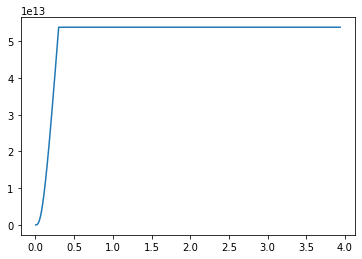

In [191]:
plt.plot(r,Mbr)

In [192]:
ri_M = interp1d(Mdr_dmo,r, )

In [193]:
# ri_M(Mdr_dmo)

In [194]:
rf = M.r

In [195]:
ri = ri_M(M.Mdr)

In [196]:
Mf = M.Mdr+Mbr

In [197]:
Mi = M.Mdr/f_dm

In [198]:
MiMf = ( f_dm* (Mbr/ Mdr + 1) )**-1
# MiMf

<ipython-input-198-301daa159431>:1: RuntimeWarning: divide by zero encountered in true_divide
  MiMf = ( f_dm* (Mbr/ Mdr + 1) )**-1


In [199]:
Mbr

array([5.37931034e+13, 5.37931034e+13, 5.37931034e+13, ...,
       5.37931034e+13, 5.37931034e+13, 5.37931034e+13])

Text(0.5, 0, '$M_i(r_i) ~/~ M_f(r_f)$')

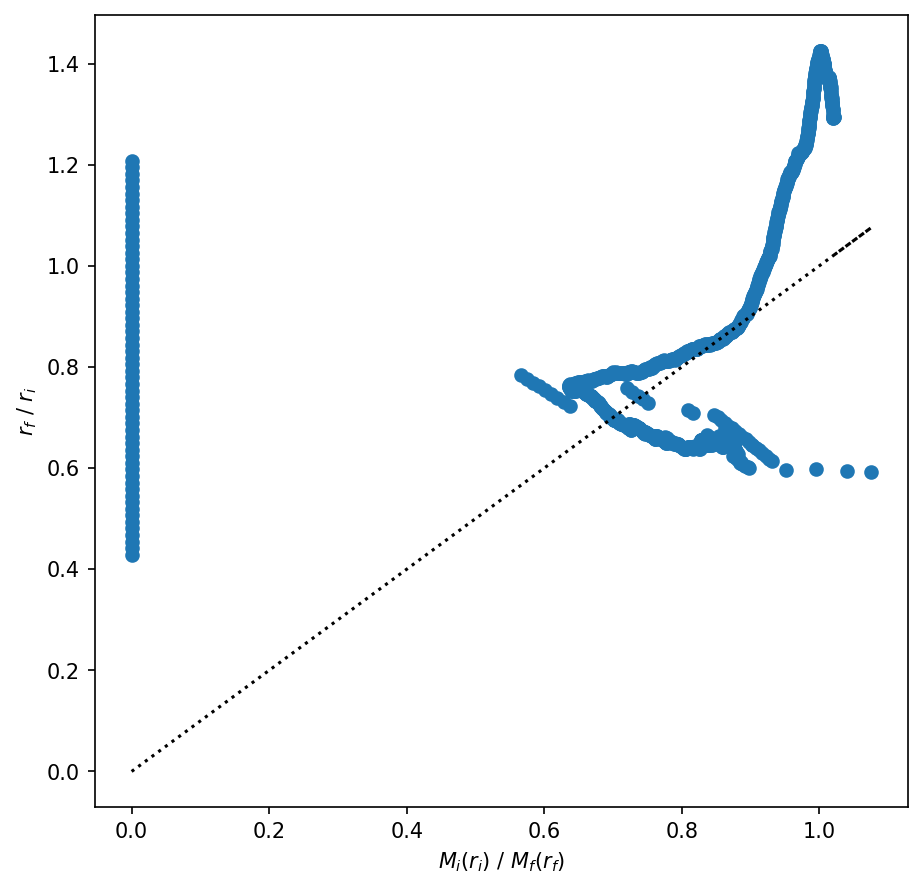

In [200]:
plt.figure(dpi=150,figsize=(7,7))
plt.plot(Mi/Mf,rf/ri,'o')
plt.plot(Mi/Mf,Mi/Mf,'k:')
# plt.plot(Mi/Mf,rf)#,'o')
# plt.xlim(0,1)
# plt.ylim(top=1)
plt.ylabel('$r_f ~/~ r_i$')
plt.xlabel('$M_i(r_i) ~/~ M_f(r_f)$')

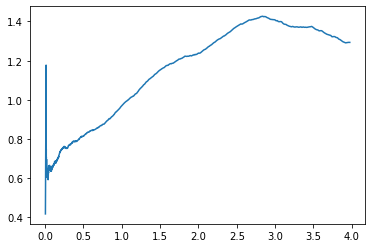

In [151]:
plt.plot(rf, rf/ri)

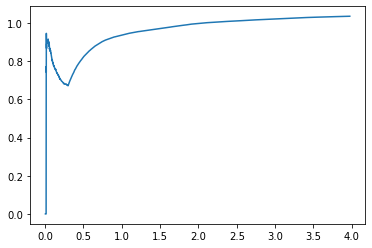

In [141]:
plt.plot(rf, Mi/Mf)

In [201]:
def adiab_pred(r, Mbr,Mdr_dmo):
    return Mdr